In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pickle

import tarea
import test_tarea

## Trasfondo

Considere el ejemplo de la "moneda mágica" de la tarea anterior. Una vez más asuma que los lanzamiento de moneda son *i.i.d.* y que siguen una distribución de Bernoulli

$$
\text{Bernoulli}(x|p) = p^x (1-p)^{1-x}, ~~ x \in \{0, 1\}
$$

donde $p$ es la probabilidad de obtener $x=1$. Adicionalmente, asuma que $p$ tiene una distribución a priori beta

$$
\text{Beta}(p|\alpha, \beta) = \frac{p^{\alpha-1} (1-p)^{\beta-1}}{\text{B}(\alpha, \beta)}  
$$ 

donde

$$
\text{B}(x, y) = \int_0^1 z^{x-1} (1-z)^{y-1} \,dz
$$

## Implementación 

1. Encuentre una expresión analítica para el estimador MAP de $p$ e impleméntela en la función `coin_map` en el script `tarea.py`
1. Las distribución a priori beta es conjugada con la distribución Bernoulli (y Binomial). Encuentre una expresión analítica para el posterior de $p$ e impleméntela en la función `coin_posterior` en el script `tarea.py`

## Experimento

Para las $N=100$ primeros lanzamientos de moneda del archivo `coin_toss.pkl` y un prior con $\alpha=\beta=2$

1. Muestre en una gráfica el posterior y el prior de $p$. 
1. Imprima el intervalo de credibilidad del posterior de $p$. 

Repita el experimento pero utilizando $\alpha=\beta=0.5$. Finalmente repita ambos experimentos pero utilizando $N=20$

Compare y discuta sus resultados

In [2]:
with open("data/coin_toss.pkl", "rb") as f:
    coins = pickle.load(f)
display(coins)

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

## Respuestas

In [3]:
!python test_tarea.py

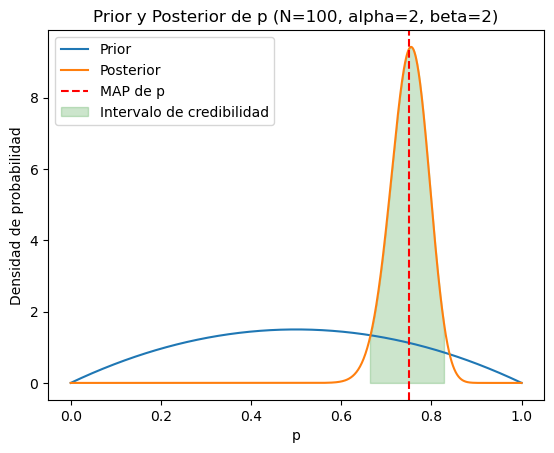

Estimador MAP de p: 0.75
Intervalo de credibilidad del posterior (95%): (0.6628872473703002, 0.8280098035386303)


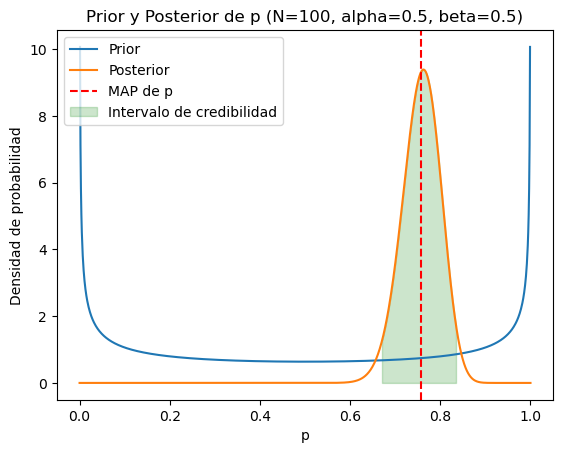

Estimador MAP de p: 0.7574257425742574
Intervalo de credibilidad del posterior (95%): (0.6696952659975322, 0.8355054240242659)


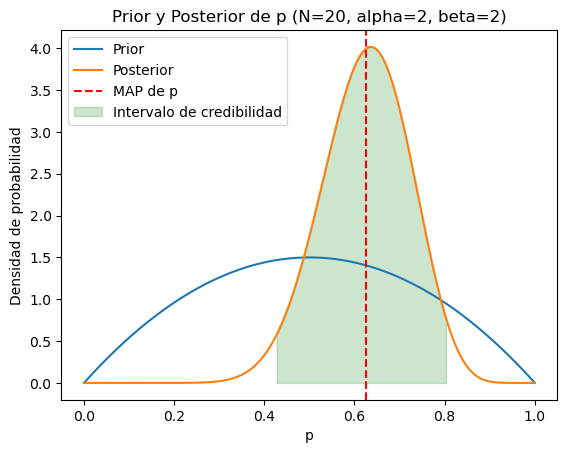

Estimador MAP de p: 0.625
Intervalo de credibilidad del posterior (95%): (0.42734396303649436, 0.8029235760309856)


In [12]:
def realizar_experimento(N, alpha, beta):
    # Cargar resultados de lanzamientos de moneda desde un archivo (coin_toss.pkl)
    with open('data/coin_toss.pkl', 'rb') as file:
        coin_toss_results = pickle.load(file)

    # Tomar los primeros N lanzamientos
    coin_toss_results = coin_toss_results[:N]

    # Calcular el estimador MAP
    map_estimate = tarea.coin_map(alpha, beta, coin_toss_results)

    # Crear valores de p para el gráfico
    p_values = np.linspace(0, 1, 1000)

    # Calcular el posterior para cada valor de p
    posterior_values = [tarea.coin_posterior(p, alpha, beta, coin_toss_results) for p in p_values]

    # Calcular el intervalo de credibilidad del posterior
    credibility_interval = beta_distribution.interval(0.95, alpha + np.sum(coin_toss_results), beta + len(coin_toss_results) - np.sum(coin_toss_results))

    # Crear gráfico del prior y posterior
    plt.plot(p_values, beta_distribution.pdf(p_values, alpha, beta), label="Prior")
    plt.plot(p_values, posterior_values, label="Posterior")
    plt.axvline(x=map_estimate, color='r', linestyle='--', label="MAP de p")
    plt.fill_between(p_values, 0, posterior_values, where=(p_values >= credibility_interval[0]) & (p_values <= credibility_interval[1]), alpha=0.2, color='g', label="Intervalo de credibilidad")
    plt.xlabel("p")
    plt.ylabel("Densidad de probabilidad")
    plt.legend()
    plt.title(f"Prior y Posterior de p (N={N}, alpha={alpha}, beta={beta})")
    plt.show()

    # Imprimir el valor de p_MAP y el intervalo de credibilidad
    print("Estimador MAP de p:", map_estimate)
    print("Intervalo de credibilidad del posterior (95%):", credibility_interval)

# Realizar el experimento con N=100 y alpha=beta=2
realizar_experimento(N=100, alpha=2, beta=2)

# Realizar el experimento con N=100 y alpha=beta=0.5
realizar_experimento(N=100, alpha=0.5, beta=0.5)

# Realizar el experimento con N=20 y alpha=beta=2
realizar_experimento(N=20, alpha=2, beta=2)

Al comparar los resultados de los tres experimentos, observamos que la elección del prior y la cantidad de datos influyen significativamente en la estimación de 𝑝 y en la confianza en esa estimación. En el primer experimento con N=100 y un prior informativo (𝛼=𝛽=2), obtuvimos una estimación precisa de 𝑝 con un posterior estrecho y un intervalo de credibilidad ajustado, lo que indica alta confianza en la estimación. En contraste, en el segundo experimento con el mismo tamaño de muestra pero un prior menos informativo (𝛼=𝛽=0.5), observamos un posterior más amplio y plano, junto con un intervalo de credibilidad más amplio, lo que refleja mayor incertidumbre. Por último, en el tercer experimento con menos datos (N=20), la estimación de 𝑝 es menos precisa y tiene una incertidumbre mayor. En resumen, estos resultados subrayan cómo la elección del prior y la cantidad de datos desempeñan un papel crucial en la estimación de 𝑝 y su nivel de confianza en la inferencia bayesiana.